In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [64]:
from PIL import Image

In [ ]:
image_path = '/home/usman/workspace/VOC2012/VOC2012/JPEGImages/'
label_path = '/home/usman/workspace/VOC2012/VOC2012/Annotations_text/'

In [58]:
# label = open('/home/usman/workspace/fisheye_images/box_2d_annotations/00002_FV.txt')

label = open('/home/usman/workspace/VOC2012/VOC2012/Annotations_text/2007_000027.txt')


f = label.readlines()

In [59]:
f

['person,0,173,100,349,351\n']

In [61]:
image.shape

(500, 486, 3)

In [63]:
%%timeit
image = cv2.imread('/home/usman/workspace/VOC2012/VOC2012/JPEGImages/2007_000027.jpg')

4.38 ms ± 259 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
%%timeit
image = np.array(Image.open('/home/usman/workspace/VOC2012/VOC2012/JPEGImages/2007_000027.jpg'))

4.48 ms ± 291 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


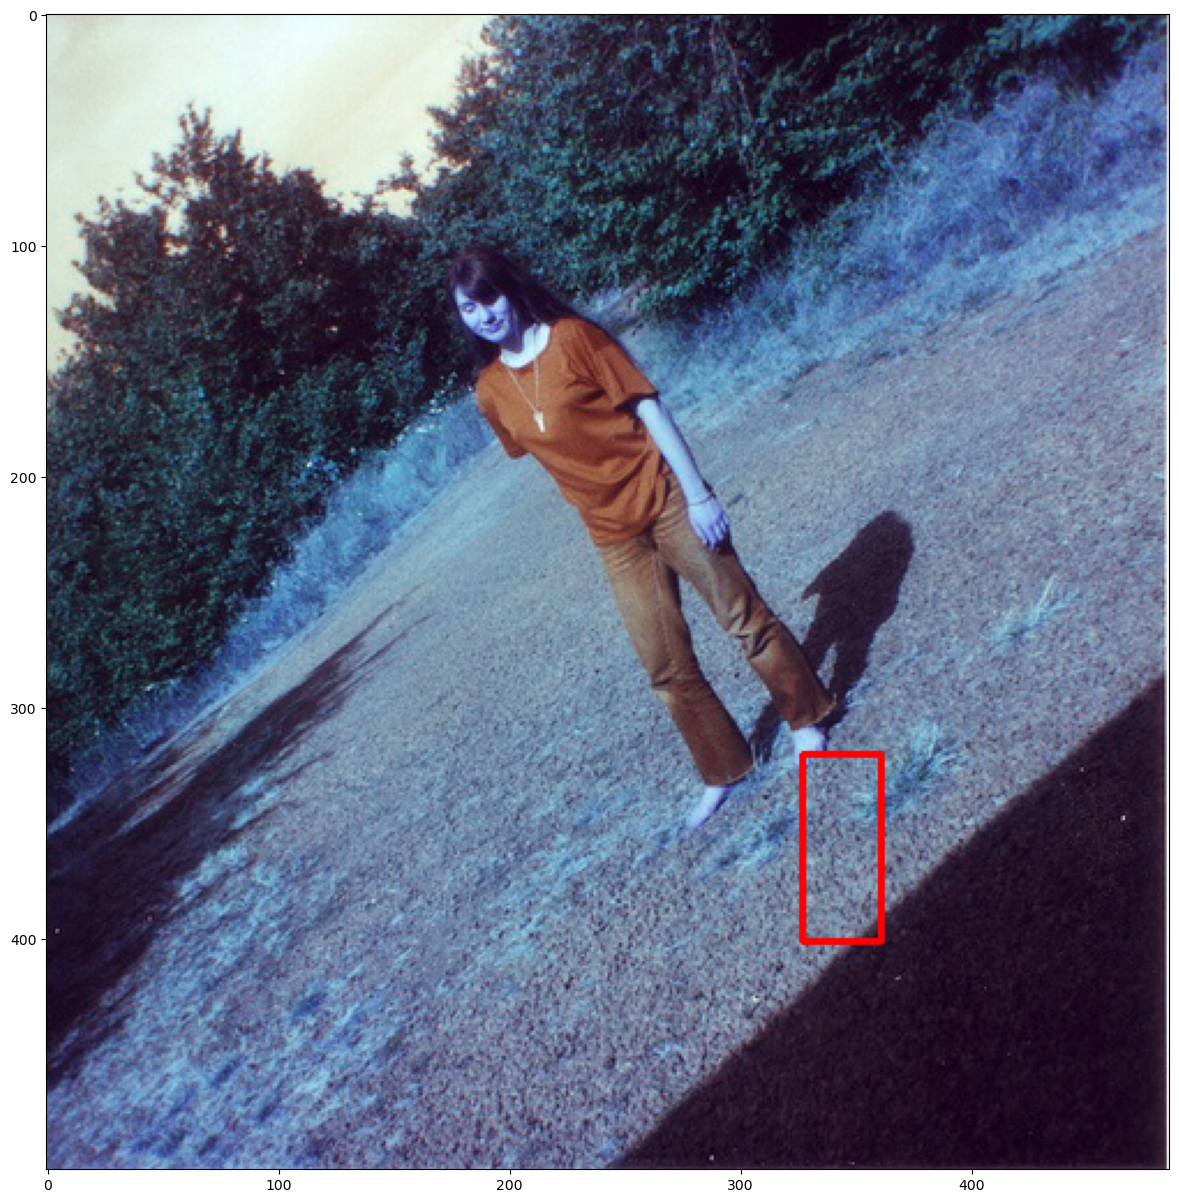

In [60]:
# image = cv2.imread('/home/usman/workspace/fisheye_images/rgb_images/00002_FV.png')

image = cv2.imread('/home/usman/workspace/VOC2012/VOC2012/JPEGImages/2007_000027.jpg')


# 700 339 723 359
# 100 700 150 750

# cv2.rectangle(image, (patch_x, patch_y), (patch_x+patch_size, patch_y+patch_size), color = (255,0,0), thickness = 3)

# for box in f:
    
#     label_name, label_num, min_x, min_y, max_x, max_y = box.split(',')
    
#     min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
    
    
#     image = cv2.rectangle(image, (min_x, min_y), (max_x, max_y), color = (255,0,0), thickness = 2)

# 258, 259, 547, 548

image = cv2.rectangle(image, (327, 320), (361,401), color = (255,0,0), thickness = 2)

plt.figure(figsize=(15, 15))

plt.imshow(image)

In [35]:
flip_image.shape

(966, 1280, 3)

In [36]:
image.shape

(966, 1280, 3)

In [45]:
%%timeit
cv2.flip(image, 1)

831 µs ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [46]:
%%timeit
np.flip(image, axis = 1)

2.62 µs ± 358 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [57]:
(327, height - 401), (361, height - 320)

((327, 565), (361, 646))

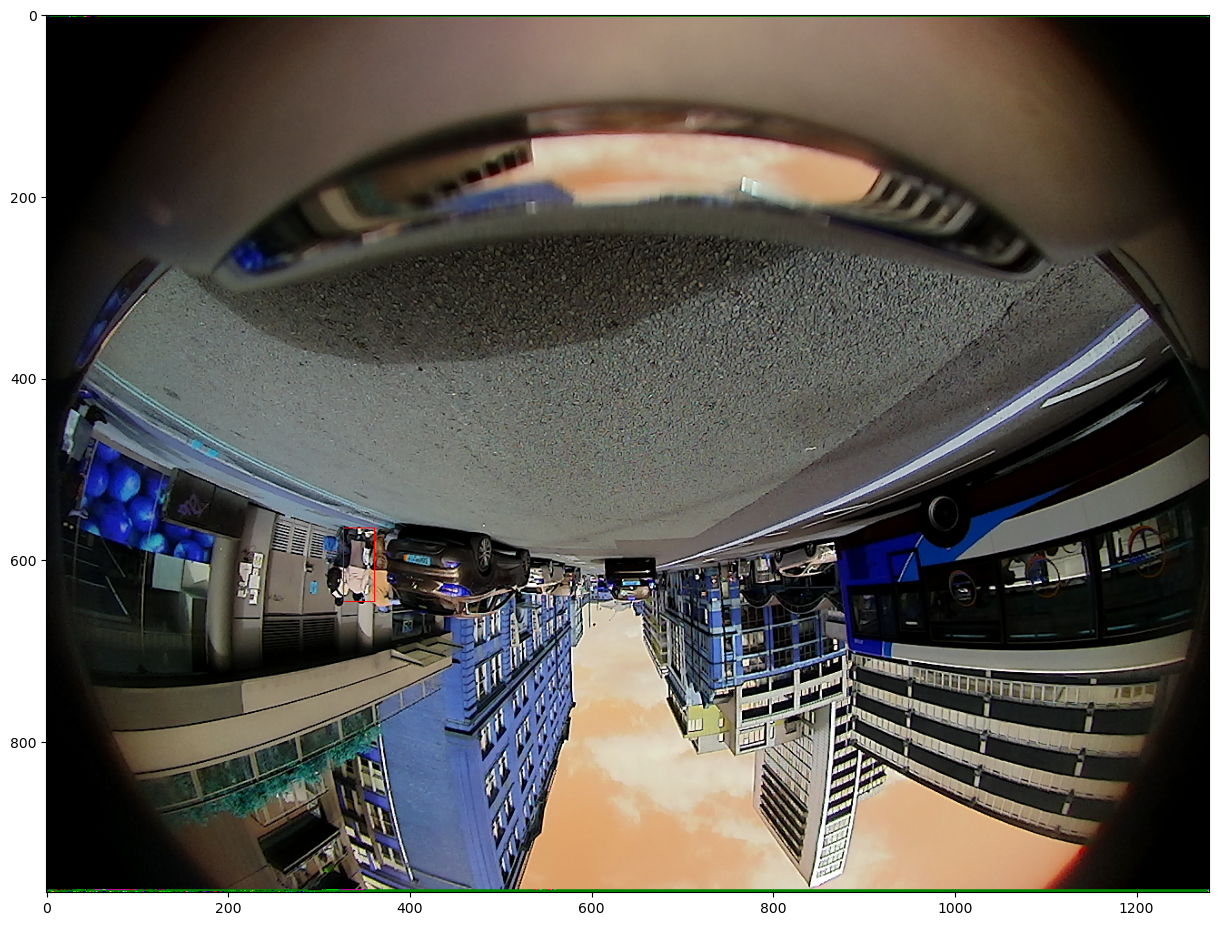

In [54]:
image = cv2.imread('/home/usman/workspace/fisheye_images/rgb_images/00002_FV.png')

height = image.shape[0]
width = image.shape[1]

flip_image = cv2.flip(image, 0)# np.flip(image, axis = 1)

flip_image = cv2.rectangle(flip_image, (361, height - 401), (327, height - 320), color = (255,0,0), thickness = 1)

plt.figure(figsize=(15, 15))

plt.imshow(flip_image)

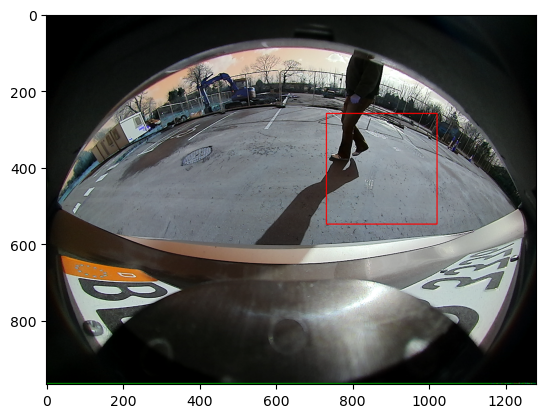

In [8]:
plt.imshow( np.flip(image, axis = 1) )

In [ ]:
image = cv2.imread('/home/usman/workspace/fisheye_images/rgb_images/07600_RV.png')

patch_image = image[patch_y:patch_y+patch_size, patch_x:patch_x+patch_size]

plt.figure(figsize=(15, 15))
    
plt.imshow(patch_image)

In [ ]:
image = cv2.imread('/home/usman/workspace/fisheye_images/rgb_images/07600_RV.png')
# define some values
patch_center = (403, 404)
# patch_center = np.array([np.random.randint(400, 500), np.random.randint(400, 500)])
patch_scale = 1.#np.random.uniform()
    

# calc patch position and extract the patch
smaller_dim = np.min(image.shape[0:2])
patch_size = int(patch_scale * smaller_dim)
patch_x = max(0, int(patch_center[0] - patch_size / 2.))
patch_y = max(0, int(patch_center[1] - patch_size / 2.))
patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

In [ ]:
patch_size

In [ ]:
patch_x, patch_y, patch_x+patch_size, patch_y+patch_size

In [ ]:
image[patch_y:patch_y+patch_size, patch_x:patch_x+patch_size].shape

In [ ]:
def calculateArea(min_x, min_y, max_x, max_y):
    return (max_x - min_x) * (max_y - min_y)    

def checkOverLap(min_x1, min_y1, max_x1, max_y1, min_x2, min_y2, max_x2, max_y2, perecent_overlap = 0.2):

    """
    Input: (min_x,min_y)--|
            |             |
            |             |
            |--max_x,max_y|
            min_x1, min_y1, max_x1, max_y1 of first rectangle
            min_x2, min_y2, max_x2, max_y2 of second rectable
    Output: bool
        return False if the first rectangles is > percent_overlap with in the second overlap
    """

    min_x = max(min_x1, min_x2)
    min_y = max(min_y1, min_y2)
    
    max_x = min(max_x1, max_x2)
    max_y = min(max_y1, max_y2)
    
    if max_x - min_x < 0 or max_y - min_y < 0:
        return False
    bbox_area = calculateArea(min_x1, min_y1, max_x1, max_y1)
    intersection_area = calculateArea(min_x, min_y, max_x, max_y)
    if intersection_area / bbox_area > perecent_overlap:
        return True
    return False

In [ ]:
print(checkOverLap(957, 356, 993, 433, patch_x, patch_y, patch_x+patch_size, patch_y+patch_size))

# 382, 329), (402, 379
print(checkOverLap(382, 329, 402, 379, patch_x, patch_y, patch_x+patch_size, patch_y+patch_size))


In [ ]:
label = open('/home/usman/workspace/fisheye_images/box_2d_annotations/07600_RV.txt')

f = label.readlines()

In [ ]:
boxes_in_bounds = []

for box in f:
    label_name, label_num, min_x, min_y, max_x, max_y = box.split(',')
    min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
#     if min_x < patch_x or max_y > patch_x+patch_size or min_y < patch_y or max_y > patch_y+patch_size:
    if checkOverLap(min_x, min_y, max_x, max_y, patch_x, patch_y, patch_x+patch_size, patch_y+patch_size) == False:
        continue
    else:
        print(box)
        min_x, min_y, max_x, max_y = max(0, int(min_x) - patch_x), max(0, int(min_y) - patch_y), \
        min(patch_size, int(max_x) - patch_x), min(patch_size, int(max_y) - patch_y)

    #     print(label_name, label_num, min_x, min_y, max_x, max_y)
        boxes_in_bounds.append([label_name, label_num, min_x, min_y, max_x, max_y])

In [ ]:
boxes_in_bounds

In [ ]:
patch_image.shape

In [ ]:
image = cv2.imread('/home/usman/workspace/fisheye_images/rgb_images/07600_RV.png')

patch_image = image[patch_y:patch_y+patch_size, patch_x:patch_x+patch_size]

for box in boxes_in_bounds:
    
    label_name, label_num, min_x, min_y, max_x, max_y = box#.split(',')
    
    min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
    
    print(min_x, min_y, max_x, max_y)
        
    patch_image = cv2.rectangle(patch_image, (min_x, min_y), (max_x, max_y), color = (255,0,0), thickness = 1)

# min_x, min_y, max_x, max_y = 294, 191, 314, 241

# patch_image = cv2.rectangle(patch_image, (min_x, min_y), (max_x, max_y), color = (255,0,0), thickness = 1)

plt.figure(figsize=(15, 15))
    
plt.imshow(patch_image)

In [ ]:
smaller_dim